In [1]:
import numpy as np
from sklearn.externals import joblib
import copy
import random
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.base import clone
from sklearn import metrics
import matplotlib as mp

In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC

In [3]:
mp.rcParams.update({'font.size': 22})
mp.rc('xtick', labelsize=18) 
mp.rc('ytick', labelsize=18) 

In [4]:
datadict = joblib.load("Two_Port_Standard_Dictionary_Cleaned_Interpolated.pkl")

In [5]:
num_fake_points = 15000
magS11_deviation = 0.003
magS21_deviation = 0.0001
magS22_deviation = 0.003
frequency_range = np.linspace(2,18,50)

In [6]:
magS11_points = []
magS21_points = []
magS22_points = []
for i in range(num_fake_points):
    new_dataset = copy.deepcopy(datadict['CTN210']['System 2,7'][random.choice(datadict['CTN210']['System 2,7'].keys())])
    new_dataset["magS11"] += np.random.normal(0,magS11_deviation,50)
    new_dataset["magS21"] += np.random.normal(0,magS21_deviation,50)
    new_dataset["magS22"] += np.random.normal(0,magS22_deviation,50)
    magS11_points.append(new_dataset["magS11"].tolist())
    magS21_points.append(new_dataset["magS21"].tolist())
    magS22_points.append(new_dataset["magS22"].tolist())
magS11_arr = np.array(magS11_points)
magS21_arr = np.array(magS21_points)
magS22_arr = np.array(magS22_points)

In [7]:
names = ["Gaussian Naive Bayes",
         "Bernoulli Naive Bayes",
         "Multinomial Naive Bayes",
         "Decision Tree",
         "Random Forest",
         "Quadratic Discriminant Analysis",
         "Ridge",
         "Stochastic Gradient Descent",
         "Passive Aggressive",
         "Perceptron",
         "Voting"]
names_bar_graph = ["Gaussian\nNaive\nBayes",
                   "Bernoulli\nNaive\nBayes",
                   "Multinomial\nNaive\nBayes",
                   "Decision\nTree",
                   "Random\nForest",
                   "Quadratic\nDiscriminant\nAnalysis",
                   "Ridge",
                   "Stochastic\nGradient\nDescent",
                   "Passive\nAggressive",
                   "Perceptron",
                   "Voting"]
classifiers = [
    GaussianNB(),
    BernoulliNB(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    QuadraticDiscriminantAnalysis(),
    RidgeClassifier(),
    SGDClassifier(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    VotingClassifier(estimators=[
        ('gnb',GaussianNB()),
        ('rf',RandomForestClassifier()),
        ('dt',DecisionTreeClassifier()),
        ('qda',QuadraticDiscriminantAnalysis())],voting="soft")]

## F1 Scores of magS21 vs magS21 plus random numbers of specific amplitudes

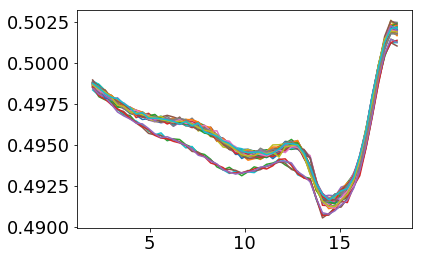

In [8]:
for i in range(50):
    plt.plot(frequency_range,magS21_arr[i])
plt.show()

In [9]:
def get_magS21_f1_score(randomness_amplitude,classifier):
    #Making Bad Data
    incorrect_magS21_data = copy.deepcopy(magS21_arr)
    for i in range(len(incorrect_magS21_data)):
        incorrect_magS21_data[i] = (incorrect_magS21_data[i] + np.random.normal(0,randomness_amplitude,50))
    #Preparing Data for training
    S21_training_data = []
    S21_training_data.extend(incorrect_magS21_data.tolist())
    S21_training_data.extend(magS21_arr.tolist())
    S21_training_data_arr = np.array(S21_training_data)
    targets = ["not valid","valid"]
    S21_target_arr = np.repeat(targets,len(magS21_arr))
    S21_training_data_arr,S21_target_arr = shuffle(S21_training_data_arr,S21_target_arr, random_state=0)
        #print "Made training and test data!"
    #Cloning and Training Classifier
    clf = clone(classifier)
        #print "Cloned Classifier!"
    clf.fit(S21_training_data_arr[:len(magS21_arr)],S21_target_arr[:len(magS21_arr)])
        #print "Trained Classifier!"
    #Making Predictions
    expected = S21_target_arr[len(magS21_arr):]
    predicted = clf.predict(S21_training_data_arr[len(magS21_arr):])
    num_correct = 0
        #print "Did Classifier Predictions!"
    for index in range(len(predicted)):
        if predicted[index] == expected[index]:
            num_correct += 1
    return (num_correct/float(len(predicted))) * 100.0

In [10]:
f1_score_test_range = np.arange(0.0001,0.01,0.0001).tolist()
all_classifier_information = []
all_classifier_label_handles = []
for index in range(len(classifiers)):
    f1scores = []
    j=0
    print "Starting for loop for " + names[index] + "!"
    for i in f1_score_test_range:
        f1score = get_magS21_f1_score(i,classifiers[index])
        f1scores.append(f1score)
        j+=1
        if j%25==0:
            print str(j) + " iterations of for loop completed!"
    #plt.subplot(5,1,index+1)
    #plt.title(names[index])
    all_classifier_information.append([f1_score_test_range,f1scores,names[index]])
    #plt.plot(f1_score_test_range,f1scores)
    print "Finished plotting data for " + names[index] + "!"
print "done!"

Starting for loop for Gaussian Naive Bayes!
25 iterations of for loop completed!
50 iterations of for loop completed!
75 iterations of for loop completed!
Finished plotting data for Gaussian Naive Bayes!
Starting for loop for Bernoulli Naive Bayes!
25 iterations of for loop completed!
50 iterations of for loop completed!
75 iterations of for loop completed!
Finished plotting data for Bernoulli Naive Bayes!
Starting for loop for Multinomial Naive Bayes!
25 iterations of for loop completed!
50 iterations of for loop completed!
75 iterations of for loop completed!
Finished plotting data for Multinomial Naive Bayes!
Starting for loop for Decision Tree!
25 iterations of for loop completed!
50 iterations of for loop completed!
75 iterations of for loop completed!
Finished plotting data for Decision Tree!
Starting for loop for Random Forest!
25 iterations of for loop completed!
50 iterations of for loop completed!
75 iterations of for loop completed!
Finished plotting data for Random Forest!


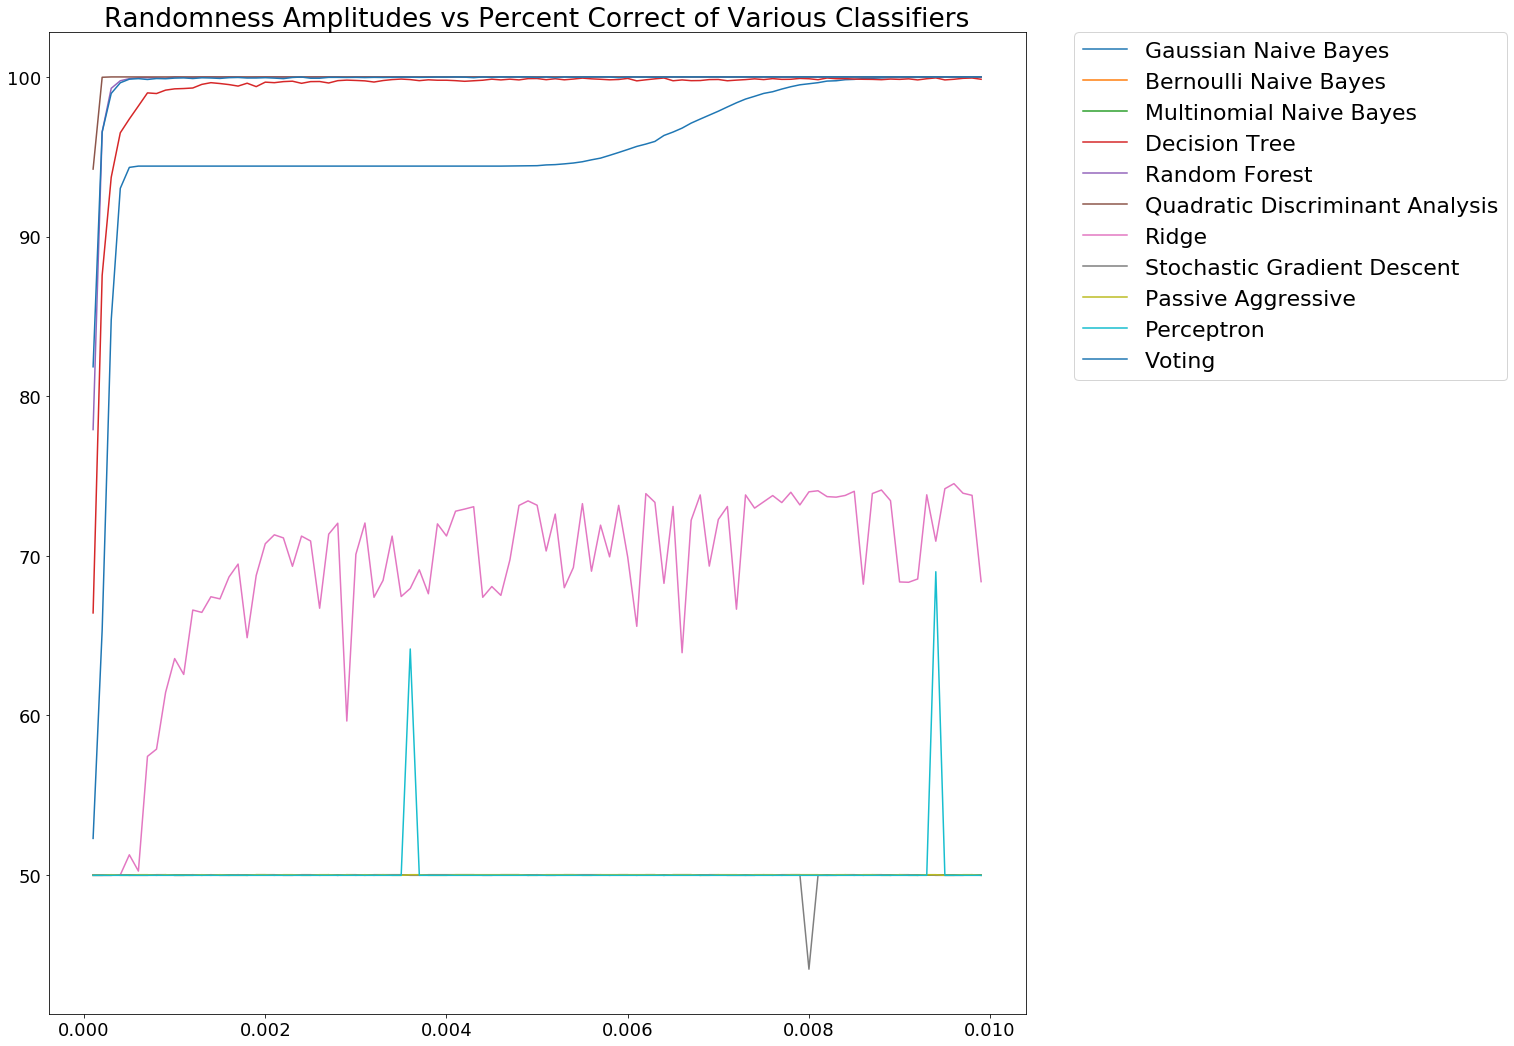

In [11]:
#plt.subplot(6,1,6)
plt.figure(figsize=(15,15))
plt.title("Randomness Amplitudes vs Percent Correct of Various Classifiers")
for i in range(len(all_classifier_information)):
    all_classifier_label_handles.extend(
        plt.plot(all_classifier_information[i][0],
                 all_classifier_information[i][1],
                 label=all_classifier_information[i][2]))
plt.legend(handles=all_classifier_label_handles,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

## Accuracy of magS11 vs Random Sin Waves

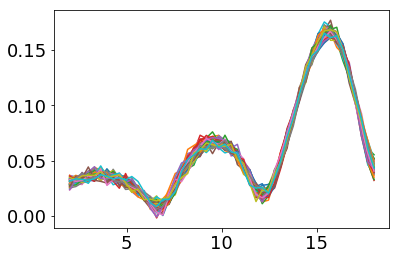

In [12]:
for i in range(50):
    plt.plot(np.linspace(2,18,50),random.choice(magS11_arr))
plt.show()

In [13]:
sin_list = []
for i in range(num_fake_points):
    vals = np.fabs((frequency_range * np.sin((1.0/6.0) * math.pi * ((random.random() * 0.25)+0.875) * frequency_range) * 0.01) + 
                     np.random.normal(0,magS11_deviation,50) + (random.random() * 0.025))
    sin_list.append(vals)

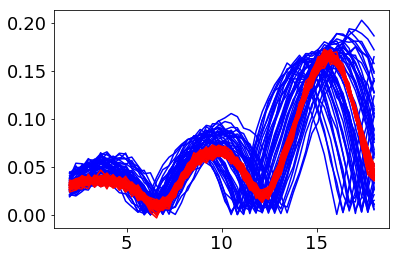

In [14]:
for i in range(50):
    plt.plot(frequency_range,sin_list[i],"b")
for i in range(50):
    plt.plot(frequency_range,magS11_arr[i],"r")
plt.show()

In [15]:
def magS11_vs_sin_f1_score(classifier):
    #Preparing training and target data
    full_data = copy.deepcopy(sin_list)
    full_data.extend(magS11_arr.tolist())
    training_data = np.array(full_data)
    targets = ["not valid","valid"]
    target_data = np.repeat(targets,num_fake_points)
    training_data,target_data = shuffle(training_data,target_data, random_state=0)
    #Cloning and training classifier
    clf = clone(classifier)
    clf.fit(training_data[:num_fake_points],target_data[:num_fake_points])
    #Making predictions
    expected = target_data[num_fake_points:]
    predicted = clf.predict(training_data[num_fake_points:])
    return metrics.f1_score(expected, predicted, average="macro")

In [16]:
magS11_test_f1_scores = []
for index in range(len(classifiers)):
    try:
        magS11_test_f1_scores.append(magS11_vs_sin_f1_score(classifiers[index]))
    except ValueError:
        magS11_test_f1_scores.append(0)
    print "Completed all classification for " + names[index] + "!"

Completed all classification for Gaussian Naive Bayes!
Completed all classification for Bernoulli Naive Bayes!
Completed all classification for Multinomial Naive Bayes!
Completed all classification for Decision Tree!
Completed all classification for Random Forest!
Completed all classification for Quadratic Discriminant Analysis!
Completed all classification for Ridge!
Completed all classification for Stochastic Gradient Descent!
Completed all classification for Passive Aggressive!
Completed all classification for Perceptron!
Completed all classification for Voting!


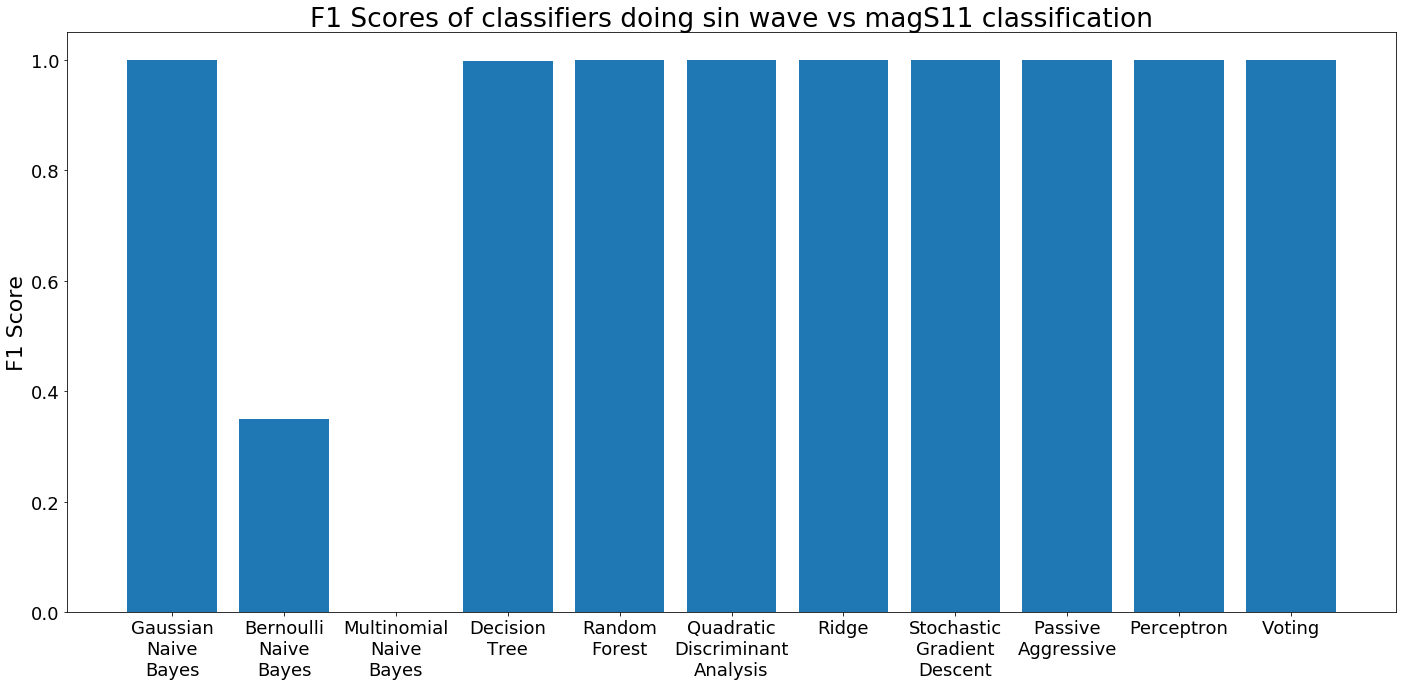

In [17]:
plt.figure(figsize=(20,10))
plt.bar(range(len(names)),magS11_test_f1_scores, align='center')
plt.xticks(range(len(names)), names_bar_graph)
plt.ylabel("F1 Score")
plt.title('F1 Scores of classifiers doing sin wave vs magS11 classification')
plt.tight_layout()
plt.show()